find contours and generate bounding boxes

In [7]:
import cv2
import numpy as np
mask_path = 'image.png'
# Load the mask image
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store bounding boxes
bounding_boxes = []

# Generate bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append([x, y, x+w, y+h])

# Now bounding_boxes contains all the bounding boxes for the mask


convert to coco

In [8]:
import json

# Example dataset information, replace with actual details if available
info = {
    "description": "Leaf Disease Segmentation Dataset",
    "url": "https://www.kaggle.com/datasets/fakhrealam9537/leaf-disease-segmentation-dataset",
    "version": "1.0",
    "year": 2024,
    "contributor": "provided by user",
    "date_created": "2024-05-05"
}

# Licenses (typically dataset-specific, this is an example placeholder)
licenses = [{
    "id": 1,
    "name": "Unknown License",
    "url": "https://www.kaggle.com/datasets/fakhrealam9537/leaf-disease-segmentation-dataset"
}]

# Placeholder for categories, should be defined according to the actual classes in the dataset
categories = [{
    "id": 1,
    "name": "disease",
    "supercategory": "leaf"
}]

# Building the annotations and images lists for COCO format
annotations = []
images = []
annotation_id = 1

for i, bbox in enumerate(bounding_boxes, start=1):
    annotations.append({
        "id": annotation_id,
        "image_id": i,
        "category_id": 1,  # Assuming only one category 'disease'
        "segmentation": [],  # This example does not include segmentation masks
        "area": (bbox[2] - bbox[0]) * (bbox[3] - bbox[1]),
        "bbox": bbox,
        "iscrowd": 0
    })
    images.append({
        "id": i,
        "width": mask.shape[1],
        "height": mask.shape[0],
        "file_name": f"image_{i}.png",
        "license": 1,
        "flickr_url": "",  # Typically used for reference, not applicable here
        "coco_url": "",    # Typically used for reference, not applicable here
        "date_captured": "2024-05-05"
    })
    annotation_id += 1

# Combine everything into the COCO dataset format
coco_format = {
    "info": info,
    "licenses": licenses,
    "images": images,
    "annotations": annotations,
    "categories": categories
}

# Save the COCO format data to a JSON file
coco_file_path = "./leaf_disease_coco.json"
with open(coco_file_path, "w") as file:
    json.dump(coco_format, file)

coco_file_path


'./leaf_disease_coco.json'

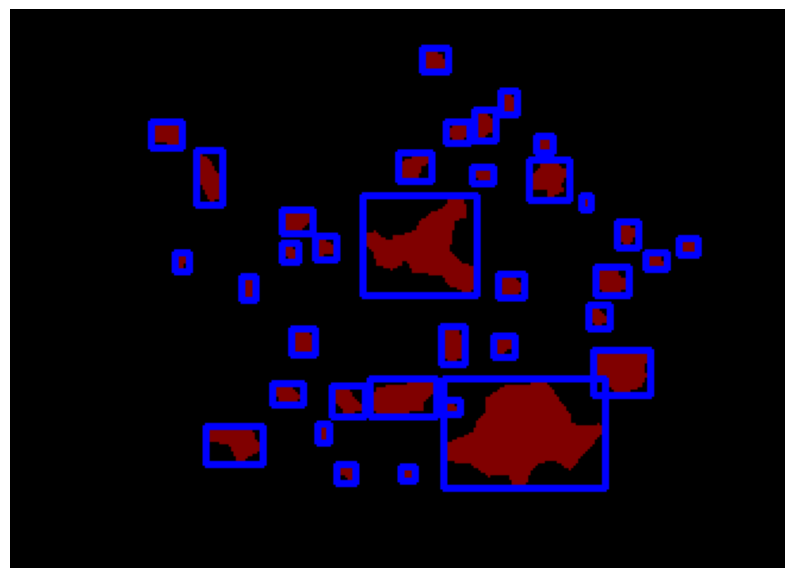

In [9]:
import json
import matplotlib.pyplot as plt
import cv2

# Load the JSON data
with open("./leaf_disease_coco.json") as f:
    coco_data = json.load(f)

# Extract bounding box information
bounding_boxes = [anno['bbox'] for anno in coco_data['annotations']]

# Load the mask image
mask_path = "./image.png"
mask_image = cv2.imread(mask_path, cv2.IMREAD_ANYCOLOR)

# Convert the mask to a 3-channel image to display bounding boxes in color
mask_image_rgb = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

# Draw bounding boxes on the image
for bbox in bounding_boxes:
    x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
    cv2.rectangle(mask_image_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Blue boxes

# Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(mask_image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
